**Text to Audio Genration**

In [42]:
pip install gTTS

In [43]:
from gtts import gTTS
import os

mytext = 'Hello Madam'

language = 'en'

myobj = gTTS(text=mytext, lang=language, slow=False)

myobj.save("audio.mp3")

os.system("start audio.mp3")

32512

In [44]:
pip install pydub simpleaudio

In [45]:
from IPython.display import Audio

Audio("audio.mp3", autoplay=True)

**Text to Code Generator Generation**

In [46]:
pip install pyqrcode

In [47]:
pip install pypng

In [49]:
import pyqrcode
import png
from pyqrcode import QRCode

write_url = "www.ltce.in"

url = pyqrcode.create(write_url)

url.svg("myqr.svg", scale = 8)

url.png('myqr.png', scale = 6)

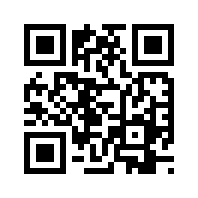

In [50]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Image

image = cv2.imread("myqr.png")

display(Image(filename="myqr.png"))

**Text to Quote/Emoji Generation**

In [51]:
!pip install emoji

In [52]:
import emoji

text = "Hey Mrs! :computer: I want to go on a hiiking"

emoji_text = emoji.emojize(text, language="alias")
print(emoji_text)

Hey Mrs! 💻 I want to go on a hiiking


**Text to Image Generation**

In [53]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)

pipeline = pipeline.to('cuda')

prompt = "cricket"

image = pipeline(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

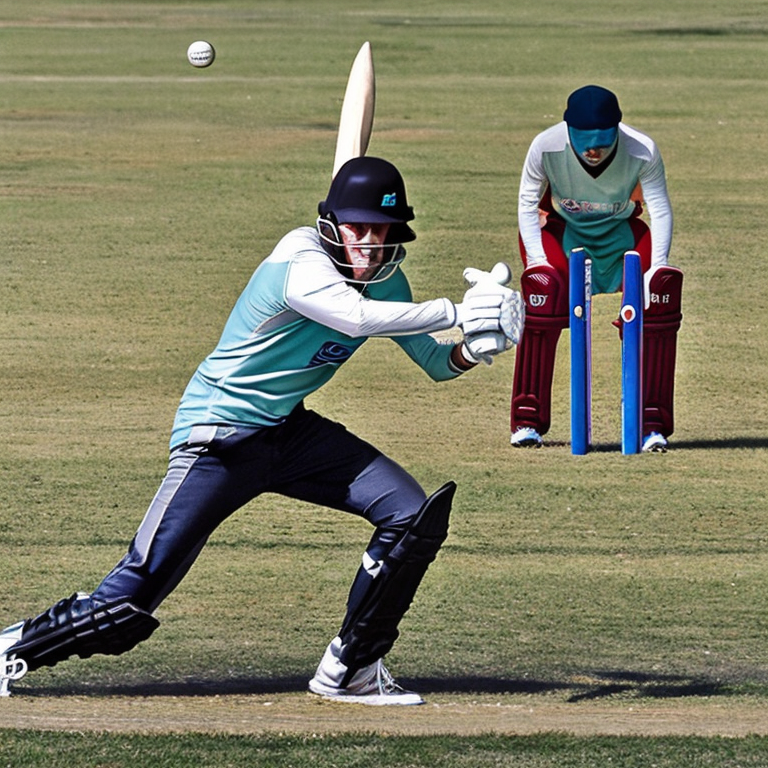

In [54]:
from IPython.display import display
display(image)

In [55]:
!pip install -q gTTS pydub simpleaudio pyqrcode pypng emoji diffusers transformers accelerate gradio
!apt-get install -y -qq libasound2-dev ffmpeg
!pip install -q xformers

from gtts import gTTS
from IPython.display import Audio as IPyAudio
import pyqrcode
import png
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import emoji
import torch
from diffusers import StableDiffusionPipeline
import gradio as gr
import os
import uuid

def text_to_audio(text):
    filename = f"{uuid.uuid4()}.mp3"
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save(filename)
    return filename

def text_to_qr(text):
    filename = f"{uuid.uuid4()}.png"
    qr = pyqrcode.create(text)
    qr.png(filename, scale=6)
    return filename

def text_to_emoji(text):
    return emoji.emojize(text, language='alias')

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
).to("cuda")

def text_to_image(prompt):
    image = pipe(prompt=prompt).images[0]
    filename = f"{uuid.uuid4()}.png"
    image.save(filename)
    return filename

custom_css = """ """

with gr.Blocks(css=custom_css, title="GenAI Model by NK TIWARI") as demo:
    with gr.Row(elem_id="main-border"):
        with gr.Column():
            gr.Markdown("![Logo](https://so-development.org/wp-content/uploads/2024/05/1710642350647.png)", elem_id="logo")
            gr.HTML("<marquee id='marquee'>🚀 Welcome to EduGenAI - Powered by Creativity & Code for the Generation of Educational Contents!</marquee>")
            gr.Markdown("🖥️ **EduGenAI: Transforming Learning with Generative AI**")

            with gr.Tab("🎧 Text to Audio"):
                txt_input = gr.Textbox(label="Enter Text")
                audio_output = gr.Audio(label="Audio Output")
                btn = gr.Button("Generate Audio")
                btn.click(fn=text_to_audio, inputs=txt_input, outputs=audio_output)

            with gr.Tab("🖼️ Text to Image"):
                image_prompt = gr.Textbox(label="Describe the image")
                image_output = gr.Image(label="Generated Image")
                btn_img = gr.Button("Generate Image")
                btn_img.click(fn=text_to_image, inputs=image_prompt, outputs=image_output)

            with gr.Tab("📸 Text to QR Code"):
                qr_input = gr.Textbox(label="Enter text or URL for QR Code")
                qr_output = gr.Image(label="QR Code")
                qr_btn = gr.Button("Generate QR Code")
                qr_btn.click(fn=text_to_qr, inputs=qr_input, outputs=qr_output)

            with gr.Tab("😄 Text to Emoji"):
                emoji_input = gr.Textbox(label="Enter Emoji Aliases (e.g. I love :pizza:)")
                emoji_output = gr.Textbox(label="Emoji Output")
                emoji_btn = gr.Button("Generate Emoji Text")
                emoji_btn.click(fn=text_to_emoji, inputs=emoji_input, outputs=emoji_output)

demo.launch(share=True)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://64b05d012ed4f4b4d7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
